<a href="https://colab.research.google.com/github/LenaVolzhina/colab/blob/main/sunrise_sunset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install astral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.9 MB/s 


https://astral.readthedocs.io/en/latest/#sun

In [3]:
from astral import LocationInfo
city = LocationInfo("Amsterdam", "Netherland", "CET", 52.3676, 4.9041)
print((
    f"Information for {city.name}/{city.region}\n"
    f"Timezone: {city.timezone}\n"
    f"Latitude: {city.latitude:.02f}; Longitude: {city.longitude:.02f}\n"
))

Information for Amsterdam/Netherland
Timezone: CET
Latitude: 52.37; Longitude: 4.90



In [4]:
import datetime
from astral.sun import sun, zoneinfo

s = sun(city.observer, date=datetime.date(2022, 12, 22), tzinfo=zoneinfo.ZoneInfo("CET"))
print((
    f'Dawn:    {s["dawn"]}\n'
    f'Sunrise: {s["sunrise"]}\n'
    f'Noon:    {s["noon"]}\n'
    f'Sunset:  {s["sunset"]}\n'
    f'Dusk:    {s["dusk"]}\n'
))

Dawn:    2022-12-22 08:06:41.835028+01:00
Sunrise: 2022-12-22 08:48:58.238097+01:00
Noon:    2022-12-22 12:38:42+01:00
Sunset:  2022-12-22 16:28:55.596942+01:00
Dusk:    2022-12-22 17:11:12.016882+01:00



In [5]:
start = datetime.date(2022, 12, 10)
arr = []
for d in range(365):
    date = start + datetime.timedelta(d)
    s = sun(city.observer, date=date, tzinfo=zoneinfo.ZoneInfo("CET"))
    arr.append(dict(date=date, sunrise=s['sunrise'].isoformat(), noon=s['noon'].isoformat(), sunset=s['sunset'].isoformat()))

In [6]:
import pandas as pd

data = pd.DataFrame(arr).set_index('date')
data.head()

,sunrise,noon,sunset
date,,,
2022-12-10,2022-12-10T08:39:26.482720+01:00,2022-12-10T12:32:56+01:00,2022-12-10T16:26:40.762172+01:00
2022-12-11,2022-12-11T08:40:30.692136+01:00,2022-12-11T12:33:23+01:00,2022-12-11T16:26:32.514741+01:00
2022-12-12,2022-12-12T08:41:32.111806+01:00,2022-12-12T12:33:51+01:00,2022-12-12T16:26:27.799403+01:00
2022-12-13,2022-12-13T08:42:30.667465+01:00,2022-12-13T12:34:19+01:00,2022-12-13T16:26:26.629061+01:00
2022-12-14,2022-12-14T08:43:26.287938+01:00,2022-12-14T12:34:47+01:00,2022-12-14T16:26:29.012453+01:00


In [7]:
for column in ('sunrise', 'noon', 'sunset'):
    data[column] = pd.to_datetime(data[column])
    data[column + '_time_minutes'] = data[column].map(lambda x: x.time().hour * 60 + x.time().minute)

data.head()

,sunrise,noon,sunset,sunrise_time_minutes,noon_time_minutes,sunset_time_minutes
date,,,,,,
2022-12-10,2022-12-10 08:39:26.482720+01:00,2022-12-10 12:32:56+01:00,2022-12-10 16:26:40.762172+01:00,519,752,986
2022-12-11,2022-12-11 08:40:30.692136+01:00,2022-12-11 12:33:23+01:00,2022-12-11 16:26:32.514741+01:00,520,753,986
2022-12-12,2022-12-12 08:41:32.111806+01:00,2022-12-12 12:33:51+01:00,2022-12-12 16:26:27.799403+01:00,521,753,986
2022-12-13,2022-12-13 08:42:30.667465+01:00,2022-12-13 12:34:19+01:00,2022-12-13 16:26:26.629061+01:00,522,754,986
2022-12-14,2022-12-14 08:43:26.287938+01:00,2022-12-14 12:34:47+01:00,2022-12-14 16:26:29.012453+01:00,523,754,986


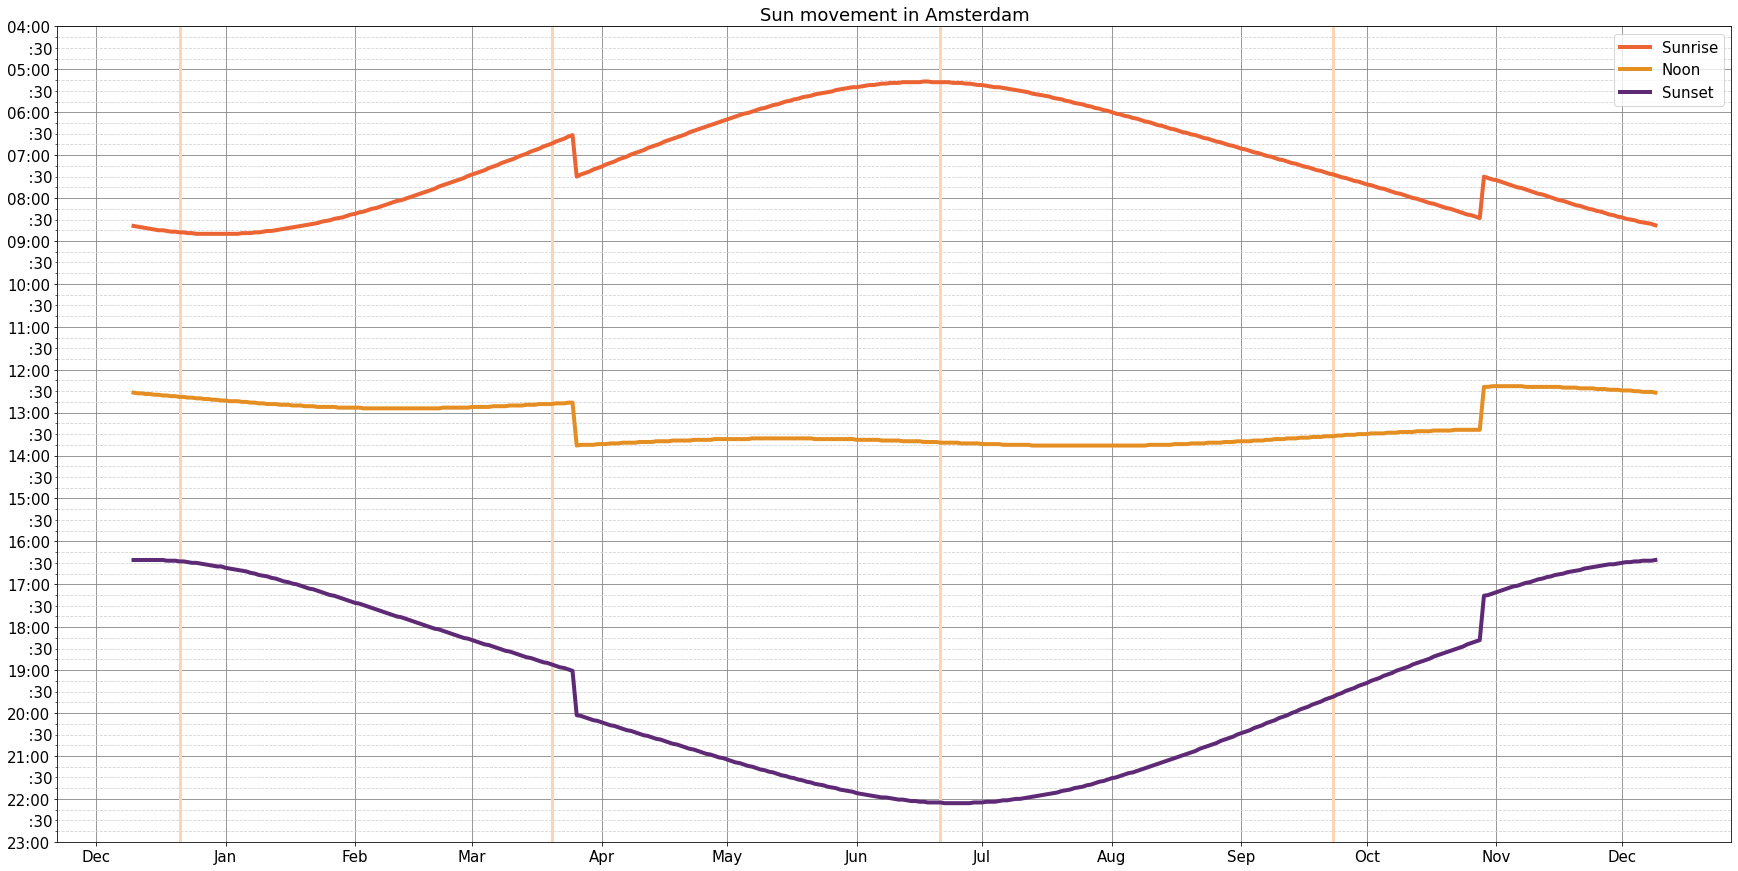

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates, ticker, rc

rc('font', size=15)
# rc('text', color='black')
# COLOR = 'darkgrey'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR

fig, ax = plt.subplots(1, figsize=(30, 15))
sns.lineplot(x='date', y='sunrise_time_minutes', data=data, label='Sunrise', color='#ec6334', linewidth=4)
sns.lineplot(x='date', y='noon_time_minutes', data=data, label='Noon', color='#e58e22', linewidth=4)
sns.lineplot(x='date', y='sunset_time_minutes', data=data, label='Sunset', color='#5e2a76', linewidth=4)

# soltsice and equinox
ymin, ymax = 60 * 23, 60 * 4
plt.vlines(
    [datetime.date(2022, 12, 21), datetime.date(2023, 3, 20), datetime.date(2023, 6, 21), datetime.date(2023, 9, 23)], 
    ymin=ymin, ymax=ymax, color='#FDD5B5', linewidth=3
)

plt.ylim(ymin, ymax)
plt.xlabel(''); plt.ylabel('')
plt.title('Sun movement in Amsterdam')

# https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
# hours
major_positions = [60 * h for h in range(24)]
major_labels = ['{:0>2}:00'.format(h) for h in range(24)]
ax.yaxis.set_major_locator(ticker.FixedLocator(major_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(major_labels))

# 15-minutes
minor_positions = [60 * h + m for h in range(24) for m in range(15, 60, 15)]
minor_labels = ['  :{}'.format( m % 60 ) if not m % 30 else '' for m in minor_positions]
ax.yaxis.set_minor_locator(ticker.FixedLocator(minor_positions))
ax.yaxis.set_minor_formatter(ticker.FixedFormatter(minor_labels))

# dates https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.AutoDateFormatter
locator = dates.MonthLocator()
formatter = dates.DateFormatter(fmt='%b') #, locator=locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# grid
ax.grid(b=True, which='major', color='grey', linestyle='-')
ax.grid(b=True, which='minor', color='lightgrey', linestyle='--')

ax.xaxis.get_major_locator()